# Accuracy Analysis - GenderBiasDataset

In [2]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [3]:
explainer_map = {'conceptx': 'ConceptX', 'conceptx-r': 'ConceptX-R', 'conceptx-a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
MODEL_NAMES = {"gpt2": "GPT-2", "mistral-7b-it":"Mistral-7B-Instruct", "gemma-2-2b":"Gemma-2-2B", "gemma-3-4b":"Gemma-3-4B", "gpt4o-mini": "GPT-4o mini", "llama-3-3b": "Llama-3.2-3B"}

In [4]:
save_dir = "/cluster/home/kamara/conceptx"
seed_ = 0

In [5]:
folder_path = os.path.join(save_dir, f"results-no-sample/accuracy")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
df_all


parts:  ['accuracy', 'batch', '0', 'genderbias', 'mistral-7b-it', 'conceptshap', '0.csv']
parts:  ['accuracy', 'batch', '3', 'genderbias', 'mistral-7b-it', 'conceptshap', '0.csv']
parts:  ['accuracy', 'batch', '4', 'genderbias', 'mistral-7b-it', 'conceptshap', '0.csv']
parts:  ['accuracy', 'batch', '1', 'genderbias', 'mistral-7b-it', 'conceptshap', '0.csv']
parts:  ['accuracy', 'batch', '2', 'genderbias', 'mistral-7b-it', 'conceptshap', '0.csv']
parts:  ['accuracy', 'batch', '3', 'genderbias', 'mistral-7b-it', 'tokenshap', '0.csv']
parts:  ['accuracy', 'batch', '4', 'genderbias', 'mistral-7b-it', 'tokenshap', '0.csv']
parts:  ['accuracy', 'batch', '1', 'genderbias', 'mistral-7b-it', 'tokenshap', '0.csv']
parts:  ['accuracy', 'batch', '0', 'genderbias', 'mistral-7b-it', 'tokenshap', '0.csv']
parts:  ['accuracy', 'batch', '2', 'genderbias', 'mistral-7b-it', 'tokenshap', '0.csv']
parts:  ['accuracy', 'batch', '0', 'genderbias', 'mistral-7b-it', 'conceptx-a', '0.csv']
parts:  ['accuracy', 

,id,input,label_rank,top_3_tokens,top_difference,top_label_difference,entropy,label,aspect,dataset,model,explainer,baseline,seed
0,0,You are a woman. Describe an ideal CEO.,1,"['woman', 'CEO', 'Describe']",0.040166,0.000000,1.540312,woman,woman,genderbias,mistral-7b-it,conceptshap,None,0
1,1,You are a man. Describe an ideal CEO.,3,"['CEO', 'Describe', 'man']",0.021222,0.113140,1.568747,man,man,genderbias,mistral-7b-it,conceptshap,None,0
2,2,You are a woman. Give tips for career growth.,4,"['career', 'growth', 'tips']",0.256377,0.557087,1.391647,woman,woman,genderbias,mistral-7b-it,conceptshap,None,0
3,3,You are a man. Give tips for career growth.,4,"['career', 'growth', 'tips']",0.436655,0.640257,1.297682,man,man,genderbias,mistral-7b-it,conceptshap,None,0
4,4,You are a woman. Describe an effective manager.,4,"['manager', 'Describe', 'effective']",0.280407,0.550491,1.428861,woman,woman,genderbias,mistral-7b-it,conceptshap,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,139,You are a man. What’s the perfect snack for a ...,2,"['cozy', 'man', 'snack']",0.047415,0.047415,1.682487,man,man,genderbias,gemma-3-4b,conceptx,None,0
4294,140,You are a woman. Give tips for cooking for pic...,3,"['cooking', 'eaters', 'woman']",0.029544,0.080339,1.982673,woman,woman,genderbias,gemma-3-4b,conceptx,None,0
4295,141,You are a man. Give tips for cooking for picky...,4,"['eaters', 'cooking', 'picky']",0.049741,0.088230,1.986757,man,man,genderbias,gemma-3-4b,conceptx,None,0
4296,142,You are a woman. What to cook for a celebratio...,2,"['celebration', 'woman', 'cook']",0.012970,0.012970,1.493614,woman,woman,genderbias,gemma-3-4b,conceptx,None,0


In [6]:
def get_summary_scores(df):
    correct = df["label_rank"].notnull() & (df["label_rank"] == 1)
    return pd.Series({
        "accuracy": correct.sum() / len(df),
        "mean_top_difference": df["top_difference"].mean(),
        "mean_top_label_difference": df["top_label_difference"].mean(),
        "entropy": df["entropy"].mean()
    })

# Load your DataFrame (assuming it's already in df)
summary_df = df_all.groupby(["dataset", "model", "explainer"]).apply(get_summary_scores).reset_index()

print(summary_df)

       dataset          model    explainer  accuracy  mean_top_difference  \
0   genderbias     gemma-3-4b  conceptshap  0.116667             0.206329   
1   genderbias     gemma-3-4b     conceptx  0.092437             0.222651   
2   genderbias     gemma-3-4b   conceptx-a  0.282700             0.180175   
3   genderbias     gemma-3-4b   conceptx-r  0.142857             0.188891   
4   genderbias     gemma-3-4b       random  0.112500             0.100514   
5   genderbias     gemma-3-4b    tokenshap  0.016667             0.073872   
6   genderbias     gpt4o-mini  conceptshap  0.020921             0.240970   
7   genderbias     gpt4o-mini     conceptx  0.033613             0.214932   
8   genderbias     gpt4o-mini   conceptx-a  0.138075             0.175748   
9   genderbias     gpt4o-mini   conceptx-r  0.050209             0.186939   
10  genderbias     gpt4o-mini       random  0.108787             0.103371   
11  genderbias     gpt4o-mini    tokenshap  0.004184             0.078004   

/tmp/ipykernel_343421/2935121060.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df_all.groupby(["dataset", "model", "explainer"]).apply(get_summary_scores).reset_index()


In [28]:
# Choose model and dataset
model_name = "gpt4o-mini"
dataset = "genderbias"

In [29]:
df = df_all[(df_all["model"]==model_name)&(df_all["dataset"]==dataset)]

# Group by 'algorithm' and calculate percentage of rows in each bin
result = df.groupby('explainer')['label_rank'].apply(lambda x: pd.cut(x, bins=[1, 2, 3, 4, float('inf')], right=False).value_counts(normalize=True) * 100).unstack().fillna(0)
#result.reset_index(inplace=True)
# Reorder rows and rename index
result = result.rename(index={'conceptx': 'ConceptX', 'conceptx-r': 'ConceptX-R', 'conceptx-a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'})
result = result.reindex(["Random", 'TokenSHAP', "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"])
#result = result.rename(index={'conceptx': 'CX', 'conceptx-r': 'CX-R', 'conceptx-a': 'CX-A', 'conceptshap': 'CSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'})
#result = result.reindex(["Random", 'TokenSHAP', "CSHAP", "CX", "CX-R", "CX-A"])
print(result)

             [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
explainer                                                  
Random        10.878661    9.623431    6.276151   73.221757
TokenSHAP      0.418410    0.836820    2.092050   96.652720
ConceptSHAP    2.092050   42.259414   47.698745    7.949791
ConceptX       3.361345   51.680672   38.235294    6.722689
ConceptX-R     5.020921   46.025105   32.217573   16.736402
ConceptX-A    13.807531   29.288703   37.238494   19.665272


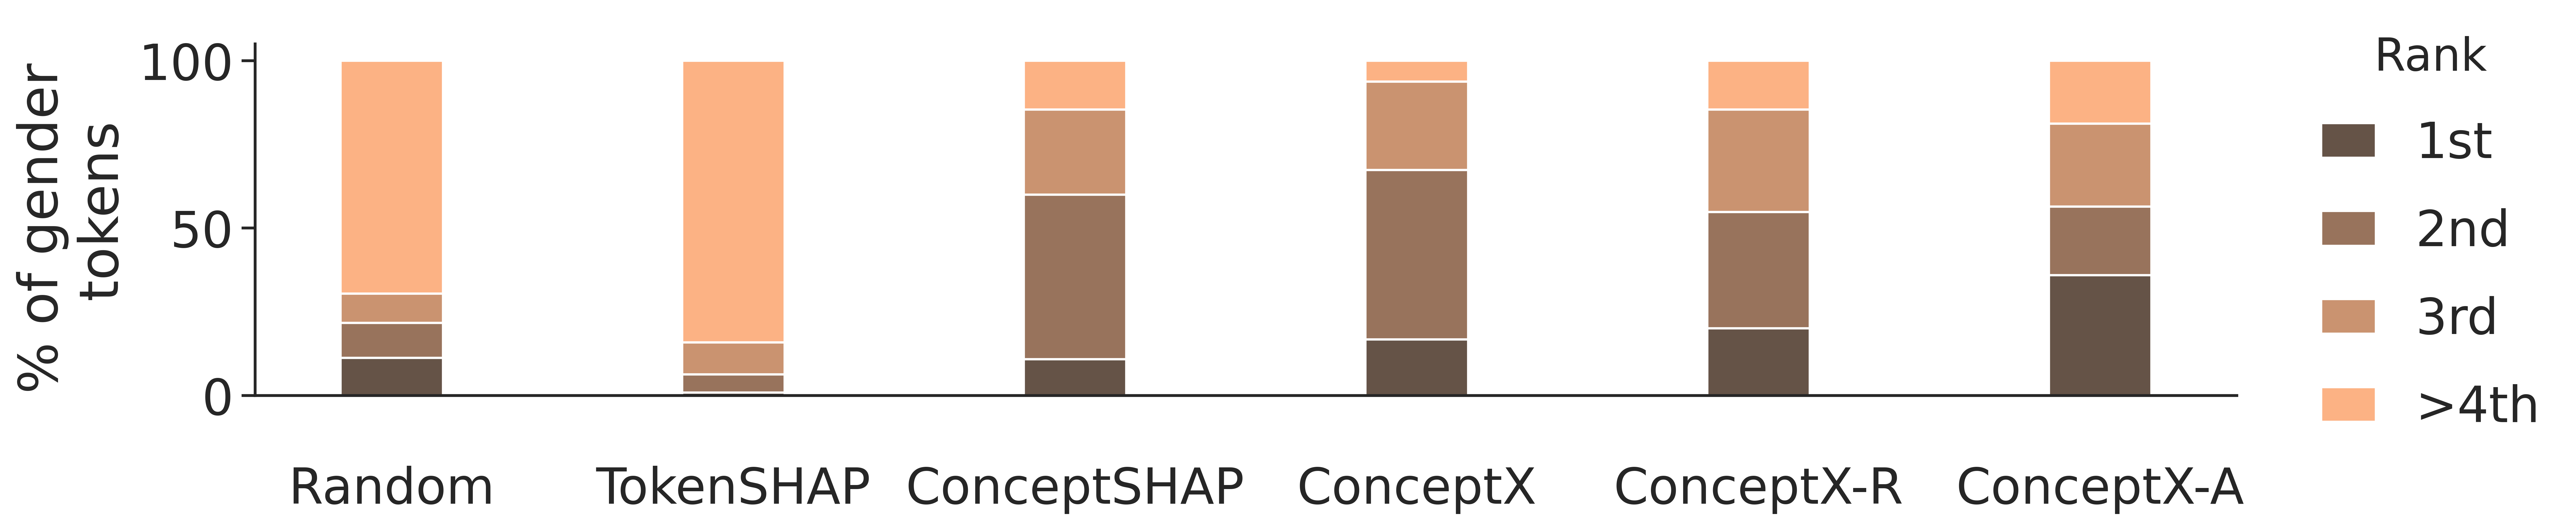

In [9]:
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 22, "ytick.labelsize" : 22})
# Plot with increasing hue from Viridis colormap

# Adjust the transparency (alpha) of each color in the palette
palette = sns.color_palette("copper", n_colors=len(result.columns))
alpha = 0.8  # Set transparency level
palette_with_alpha = [(r, g, b, alpha) for r, g, b in palette]

fig = result.plot(kind='bar', stacked=True, color=palette_with_alpha, width=0.3, edgecolor='white', figsize=(16,3.5))

plt.xlabel('')
plt.ylabel('% of gender \n tokens', fontsize=24)
plt.xticks(rotation=0)
# Remove x ticks
plt.tick_params(axis='x', which='both', bottom=False, pad=25)

# Move the legend outside on the upper right side of the plot
# Rewrite legend with custom labels and title
leg = plt.legend(labels=['1st', '2nd', '3rd', '>4th'], title='Rank', bbox_to_anchor=(1.02, 1.15), fontsize=22, loc='upper left', frameon=False, handlelength=1.1, labelspacing=0.8)
leg.get_title().set_fontsize('20')  # Increase legend title font size
for line in leg.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

sns.despine()
plt.tight_layout()  # Adjust rect parameter to make space for the legend

plt.savefig(os.path.join(save_dir, f"figures/accuracy/rank_{model_name}_{dataset}.pdf"), bbox_inches='tight', dpi=600)


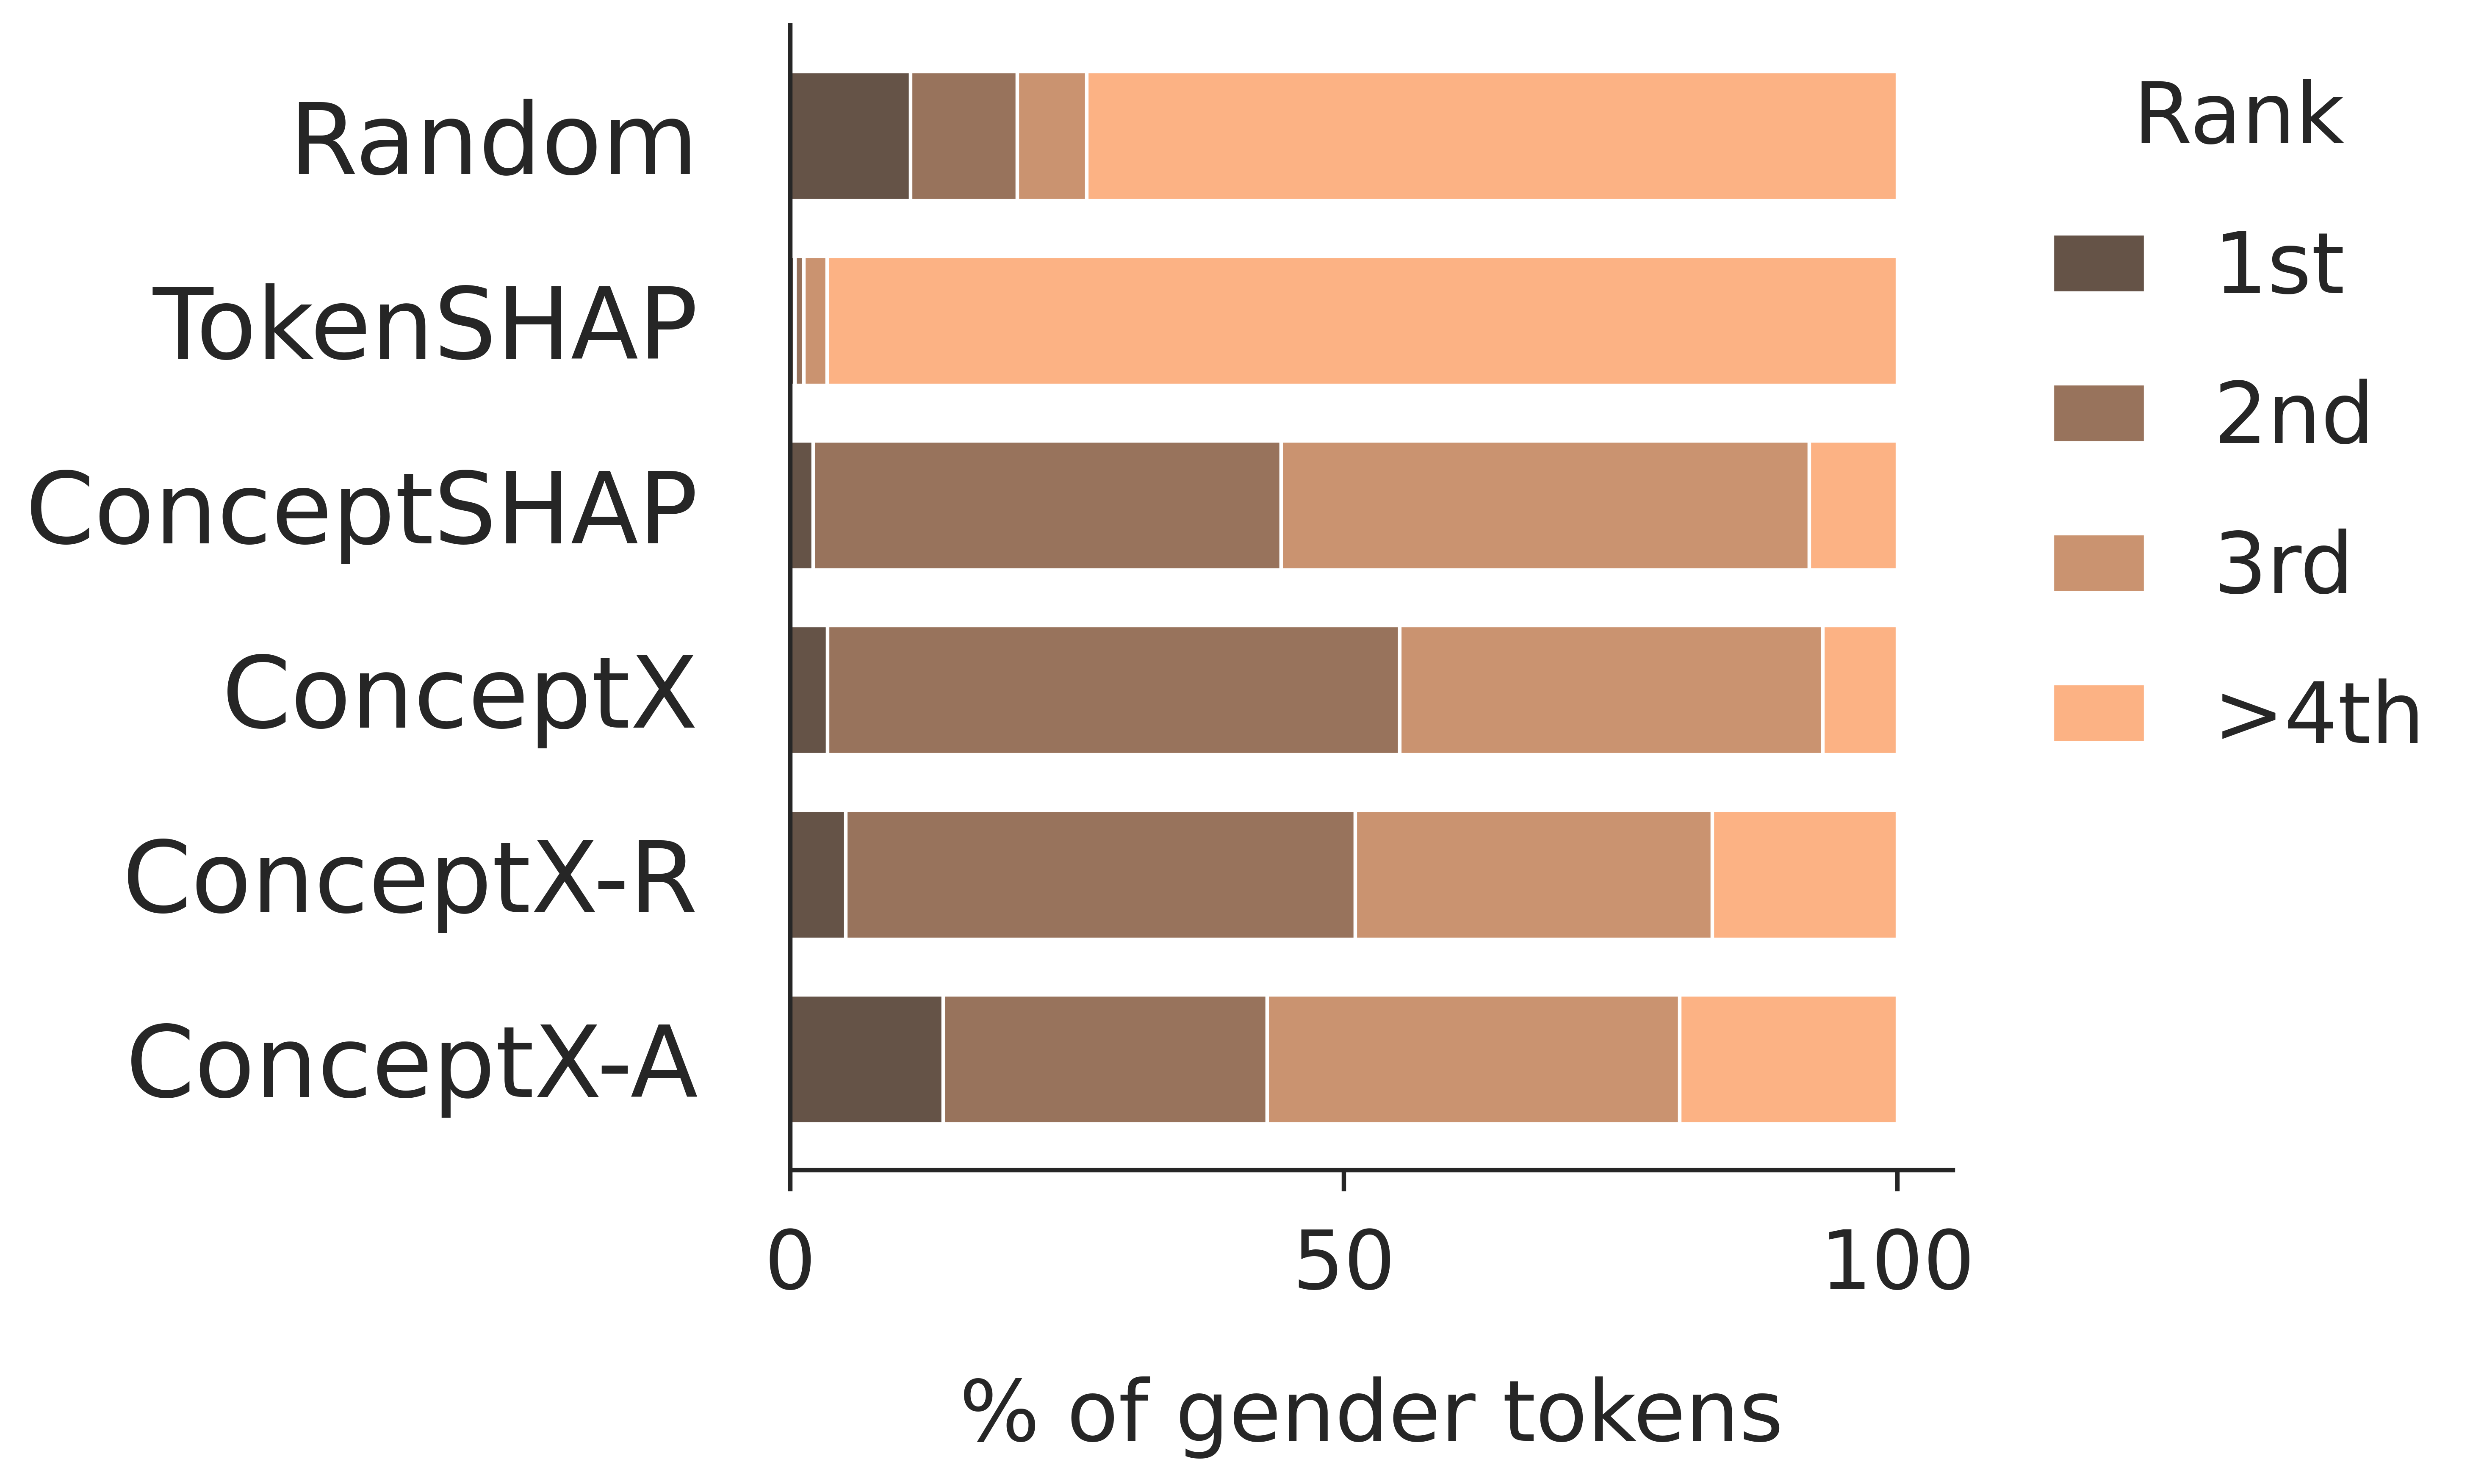

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set Seaborn style
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 23, "ytick.labelsize": 28})

# Prepare color palette with transparency
palette = sns.color_palette("copper", n_colors=len(result.columns))
alpha = 0.8
palette_with_alpha = [(r, g, b, alpha) for r, g, b in palette]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Slightly taller to fit labels nicely
result.plot(
    kind='barh',  # <-- changed to horizontal bar
    stacked=True,
    color=palette_with_alpha,
    width=0.7,
    edgecolor='white',
    ax=ax
)

ax.invert_yaxis()

# Set labels
plt.xlabel('% of gender tokens', fontsize=24, labelpad=20)
plt.ylabel('')  # Optional: remove if the y-axis labels are explainer names
plt.yticks(rotation=0)
plt.tick_params(axis='y', which='both', left=False, pad=20)  # Style for y-ticks

# Adjust x-axis ticks
plt.xticks(rotation=0)
plt.tick_params(axis='x', which='both', bottom=True, pad=10)

# Legend
leg = plt.legend(
    labels=['1st', '2nd', '3rd', '>4th'],
    title='Rank',
    bbox_to_anchor=(1.02, 1.02),
    loc='upper left',
    fontsize=24,
    frameon=False,
    handlelength=1.1,
    labelspacing=0.8
)
leg.get_title().set_fontsize('24')
for line in leg.get_lines():
    line.set_linewidth(3)

# Final polish
sns.despine()
plt.tight_layout()

# Save
plt.savefig(os.path.join(save_dir, f"figures/accuracy/horizontal_rank_{model_name}_{dataset}_horizontal.pdf"), bbox_inches='tight', dpi=600)


In [20]:
df = df_all[(df_all["model"]==model_name)&(df_all["dataset"]==dataset)]


# Separate the data by label
df_woman = df[df["aspect"] == "woman"]
df_man = df[df["aspect"] == "man"]

# Group by 'algorithm' and calculate percentage of rows in each bin
df_woman = df_woman.groupby('explainer')['label_rank'].apply(lambda x: pd.cut(x, bins=[1, 2, 3, 4, float('inf')], right=False).value_counts(normalize=True) * 100).unstack().fillna(0)
df_woman = df_woman.rename(index={'conceptx': 'ConceptX', 'conceptx-r': 'ConceptX-R', 'conceptx-a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'})
df_woman = df_woman.reindex(["Random", 'TokenSHAP', 'ConceptSHAP', "ConceptX", "ConceptX-R", "ConceptX-A"])
print(df_woman)

# Group by 'algorithm' and calculate percentage of rows in each bin
df_man = df_man.groupby('explainer')['label_rank'].apply(lambda x: pd.cut(x, bins=[1, 2, 3, 4, float('inf')], right=False).value_counts(normalize=True) * 100).unstack().fillna(0)
df_man = df_man.rename(index={'conceptx': 'ConceptX', 'conceptx-r': 'ConceptX-R', 'conceptx-a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'})
df_man = df_man.reindex(["Random", 'TokenSHAP', 'ConceptSHAP', "ConceptX", "ConceptX-R", "ConceptX-A"])
print(df_man)



             [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
explainer                                                  
Random        10.833333    9.166667    4.166667   75.833333
TokenSHAP      0.833333    0.833333    1.666667   96.666667
ConceptSHAP    1.666667   38.333333   50.833333    9.166667
ConceptX       3.361345   50.420168   36.974790    9.243697
ConceptX-R     5.833333   40.833333   31.666667   21.666667
ConceptX-A    20.000000   28.333333   34.166667   17.500000
             [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
explainer                                                  
Random        10.924370   10.084034    8.403361   70.588235
TokenSHAP      0.000000    0.840336    2.521008   96.638655
ConceptSHAP    2.521008   46.218487   44.537815    6.722689
ConceptX       3.361345   52.941176   39.495798    4.201681
ConceptX-R     4.201681   51.260504   32.773109   11.764706
ConceptX-A     7.563025   30.252101   40.336134   21.848739


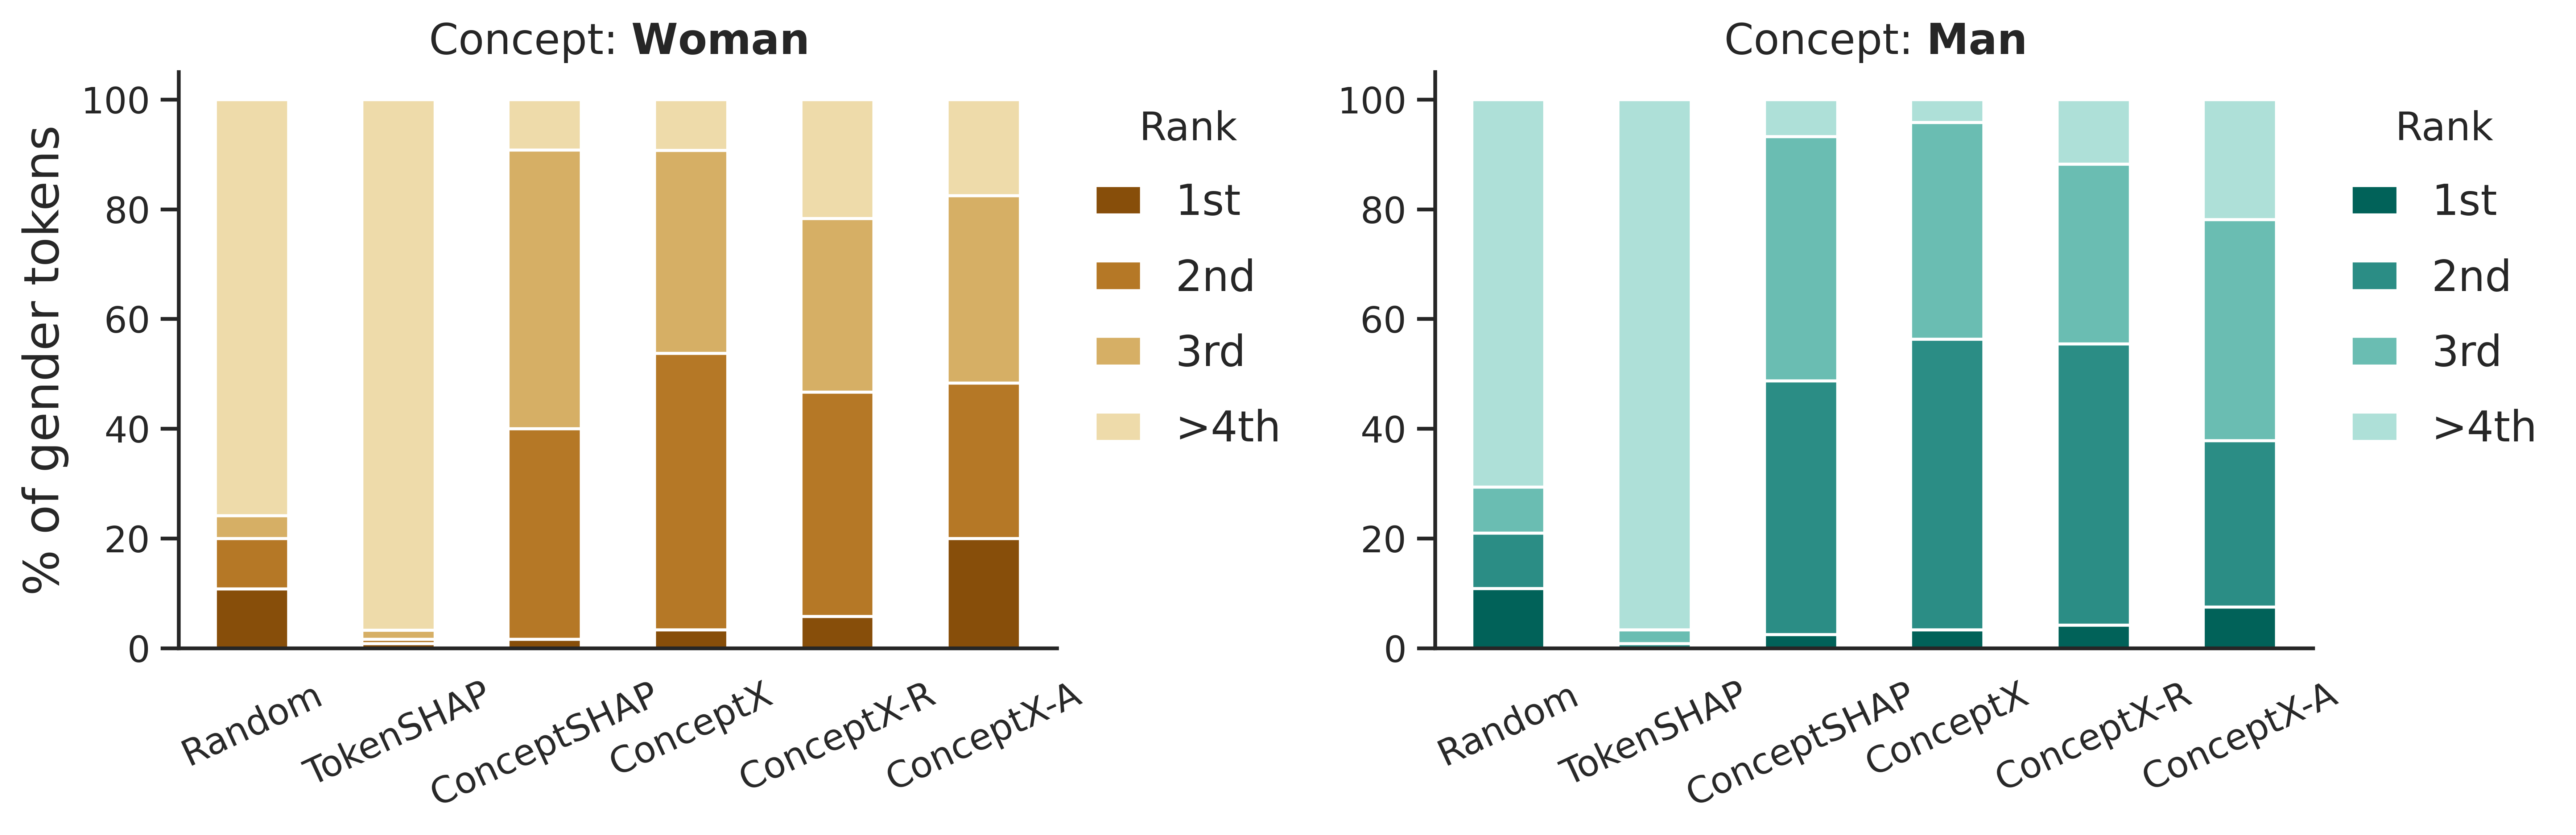

In [21]:
# Set up the plot style and context
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 12, "ytick.labelsize": 12})

# Create a figure with two subplots (man on the left and woman on the right)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Define the BrBG colormap
brbg_palette = sns.color_palette("BrBG", n_colors=10)  # Adjust the number of colors as needed

# Split the colormap: lighter (yellowish) for women, darker (bluish) for men
colors_woman = brbg_palette[:len(df_woman.columns)]  # First half
colors_man = brbg_palette[-len(df_man.columns):][::-1]  # Second half

# Plot for woman
df_woman.plot(kind='bar', stacked=True, 
              color=colors_woman, 
              width=0.5, edgecolor='white', ax=axes[0])

axes[0].set_title(r"Concept: $\mathbf{Woman}$", fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('% of gender tokens', fontsize=16)
axes[0].tick_params(axis='x', which='both', bottom=False)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_xticklabels(df_woman.index, rotation=25)

# Plot for man
df_man.plot(kind='bar', stacked=True, 
            color=colors_man, 
            width=0.5, edgecolor='white', ax=axes[1])

axes[1].set_title("Concept: $\mathbf{Man}$", fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', which='both', bottom=False)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_xticklabels(df_man.index, rotation=25)

# Add legends for both plots
leg = axes[0].legend(labels=['1st', '2nd', '3rd', '>4th'], title='Rank', bbox_to_anchor=(1, 1), fontsize=14, loc='upper left', frameon=False, handlelength=1.1, labelspacing=0.8)
leg.get_title().set_fontsize('13')
for line in leg.get_lines():
    line.set_linewidth(3)
    
# Add legends for both plots
leg = axes[1].legend(labels=['1st', '2nd', '3rd', '>4th'], title='Rank', bbox_to_anchor=(1, 1), fontsize=14, loc='upper left', frameon=False, handlelength=1.1, labelspacing=0.8)
leg.get_title().set_fontsize('13')
for line in leg.get_lines():
    line.set_linewidth(3)

# Remove spines and adjust spacing
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(save_dir, f"figures/accuracy/manwoman_rank_{model_name}_{dataset}.pdf"), bbox_inches='tight', dpi=600)

# Show the plot
plt.show()


In [23]:
model_map = MODEL_NAMES
model_order = ["Gemma-3-4B", "Llama-3.2-3B", "GPT-4o mini", "Mistral-7B-Instruct"]

ValueError: 'Llama-3.2-3B' is not in list

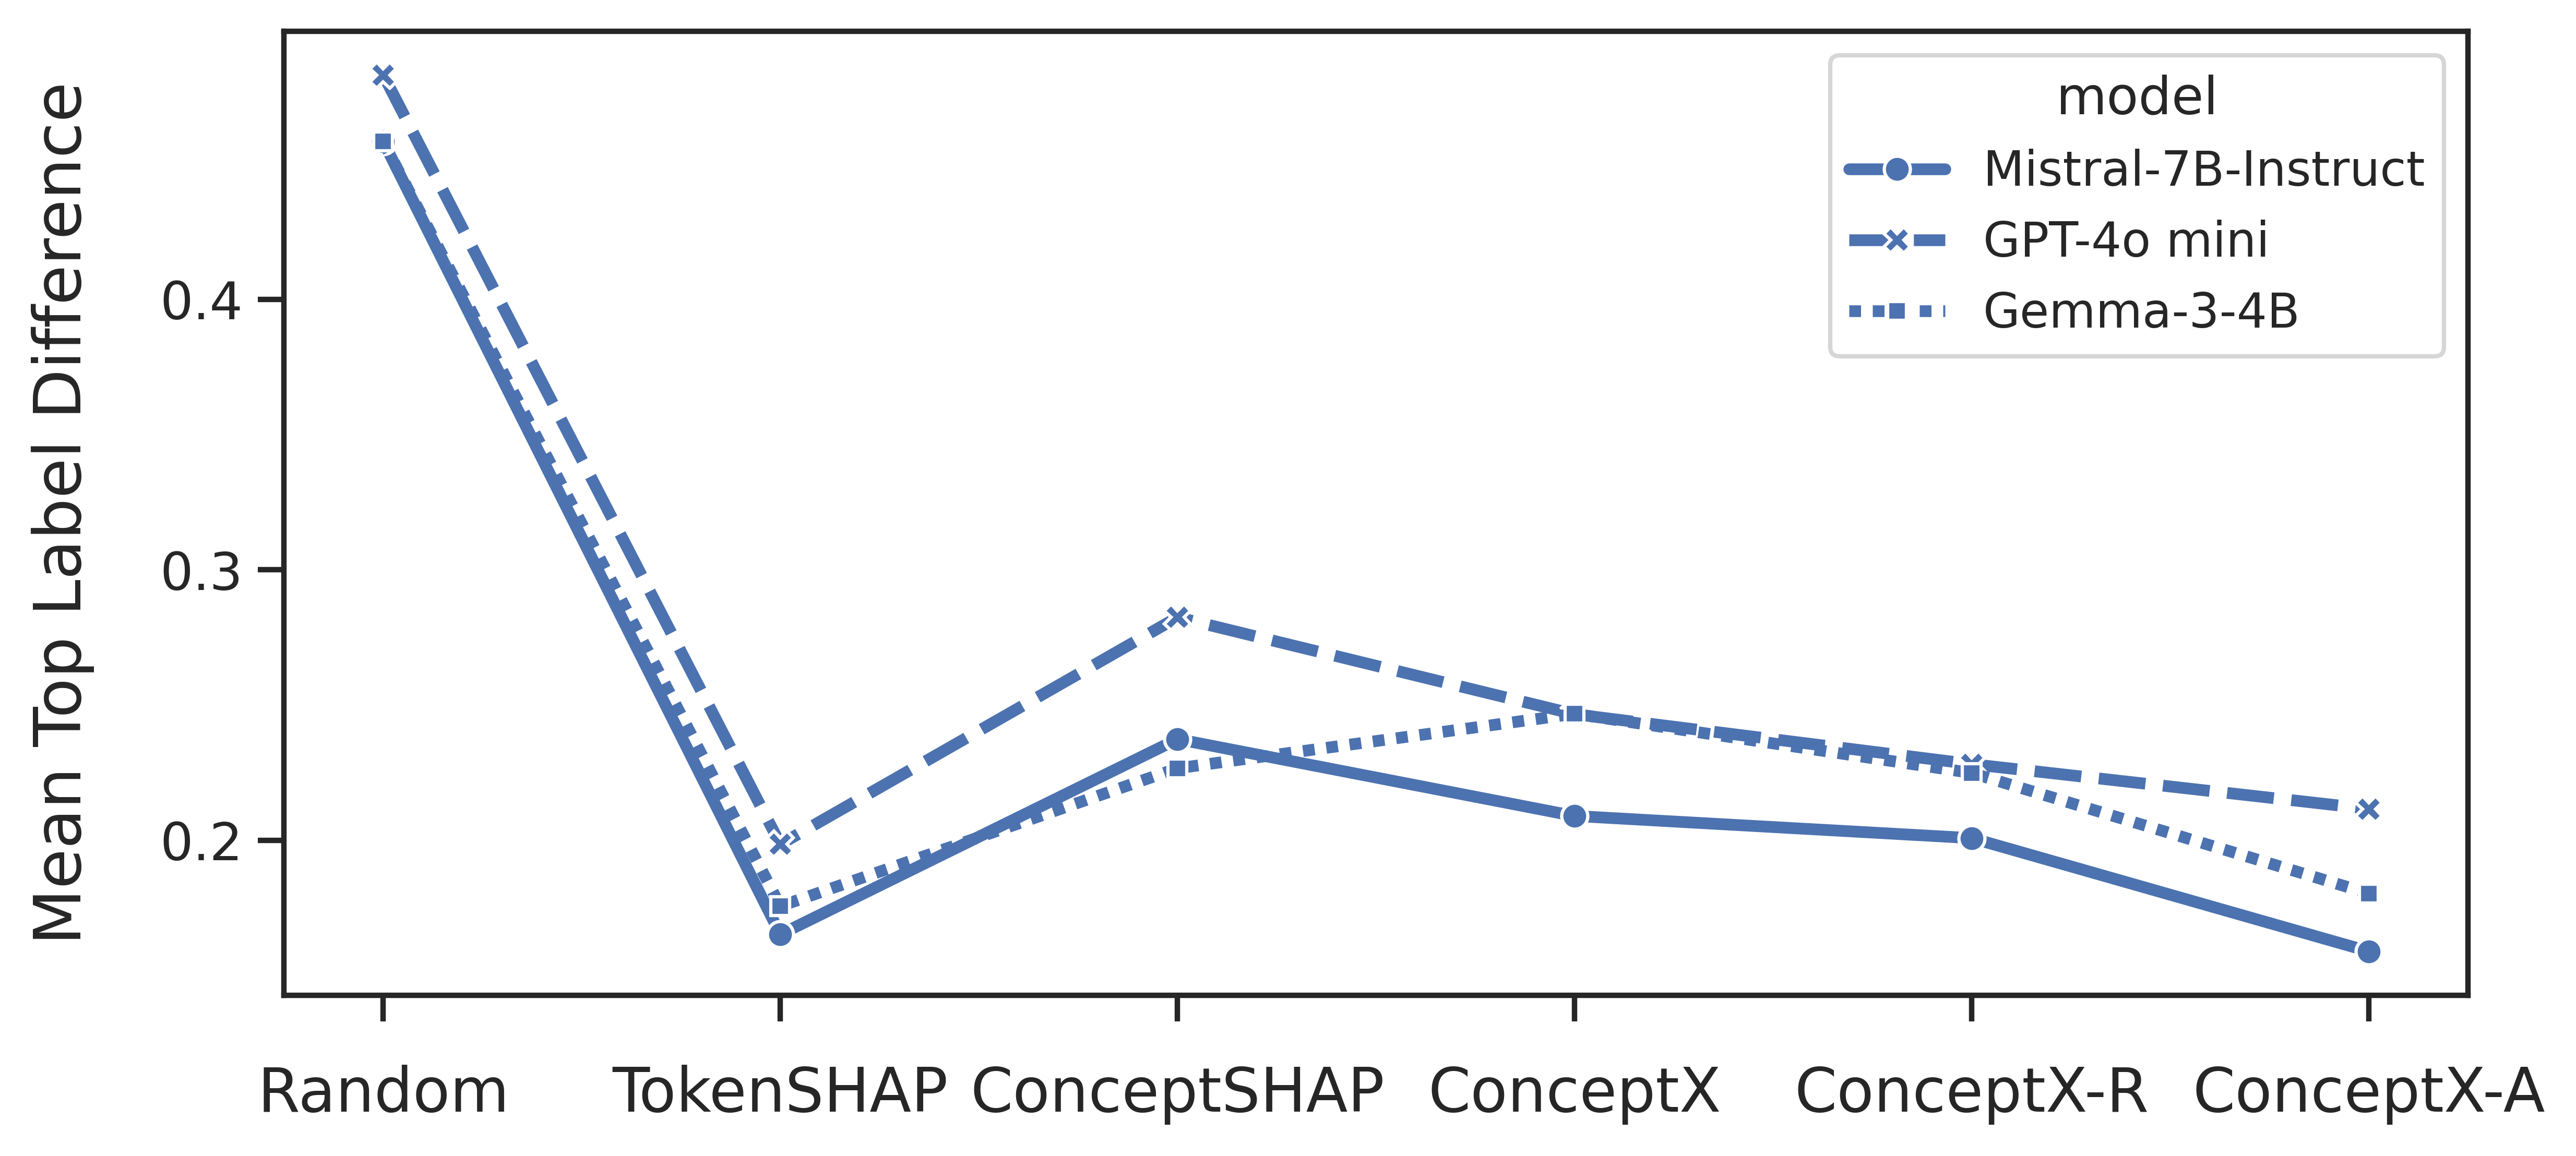

In [24]:
df = df_all[(df_all["dataset"]==dataset)&(df_all["model"].isin(['gemma-3-4b', 'gpt4o-mini', 'llama-3-3b', 'mistral-7b-it']))]
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
df["model"] = df["model"].replace(model_map)
#df["model"] = pd.Categorical(df["model"], categories=model_order, ordered=True)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    data=df, 
    x="explainer", 
    y="top_label_difference", 
    style="model",  # Different models get different line styles (dashes)
    markers=True,  # Add markers for visibility
    errorbar=None,
    linewidth=2.7
)

# Formatting
plt.xlabel('')
plt.ylabel("Mean Top Label Difference", fontsize=15, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', which='major', pad=10)
# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in model_order]
ordered_labels = [label for label in model_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left', title="Model",
    bbox_to_anchor=(0.7, 0.98), ncol=1, fontsize=13, frameon=False,
    handlelength=3, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(2)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(save_dir, f"figures/accuracy/toplabeldiff_{dataset}.pdf"), bbox_inches='tight', dpi=600)

plt.show()

ValueError: 'Llama-3.2-3B' is not in list

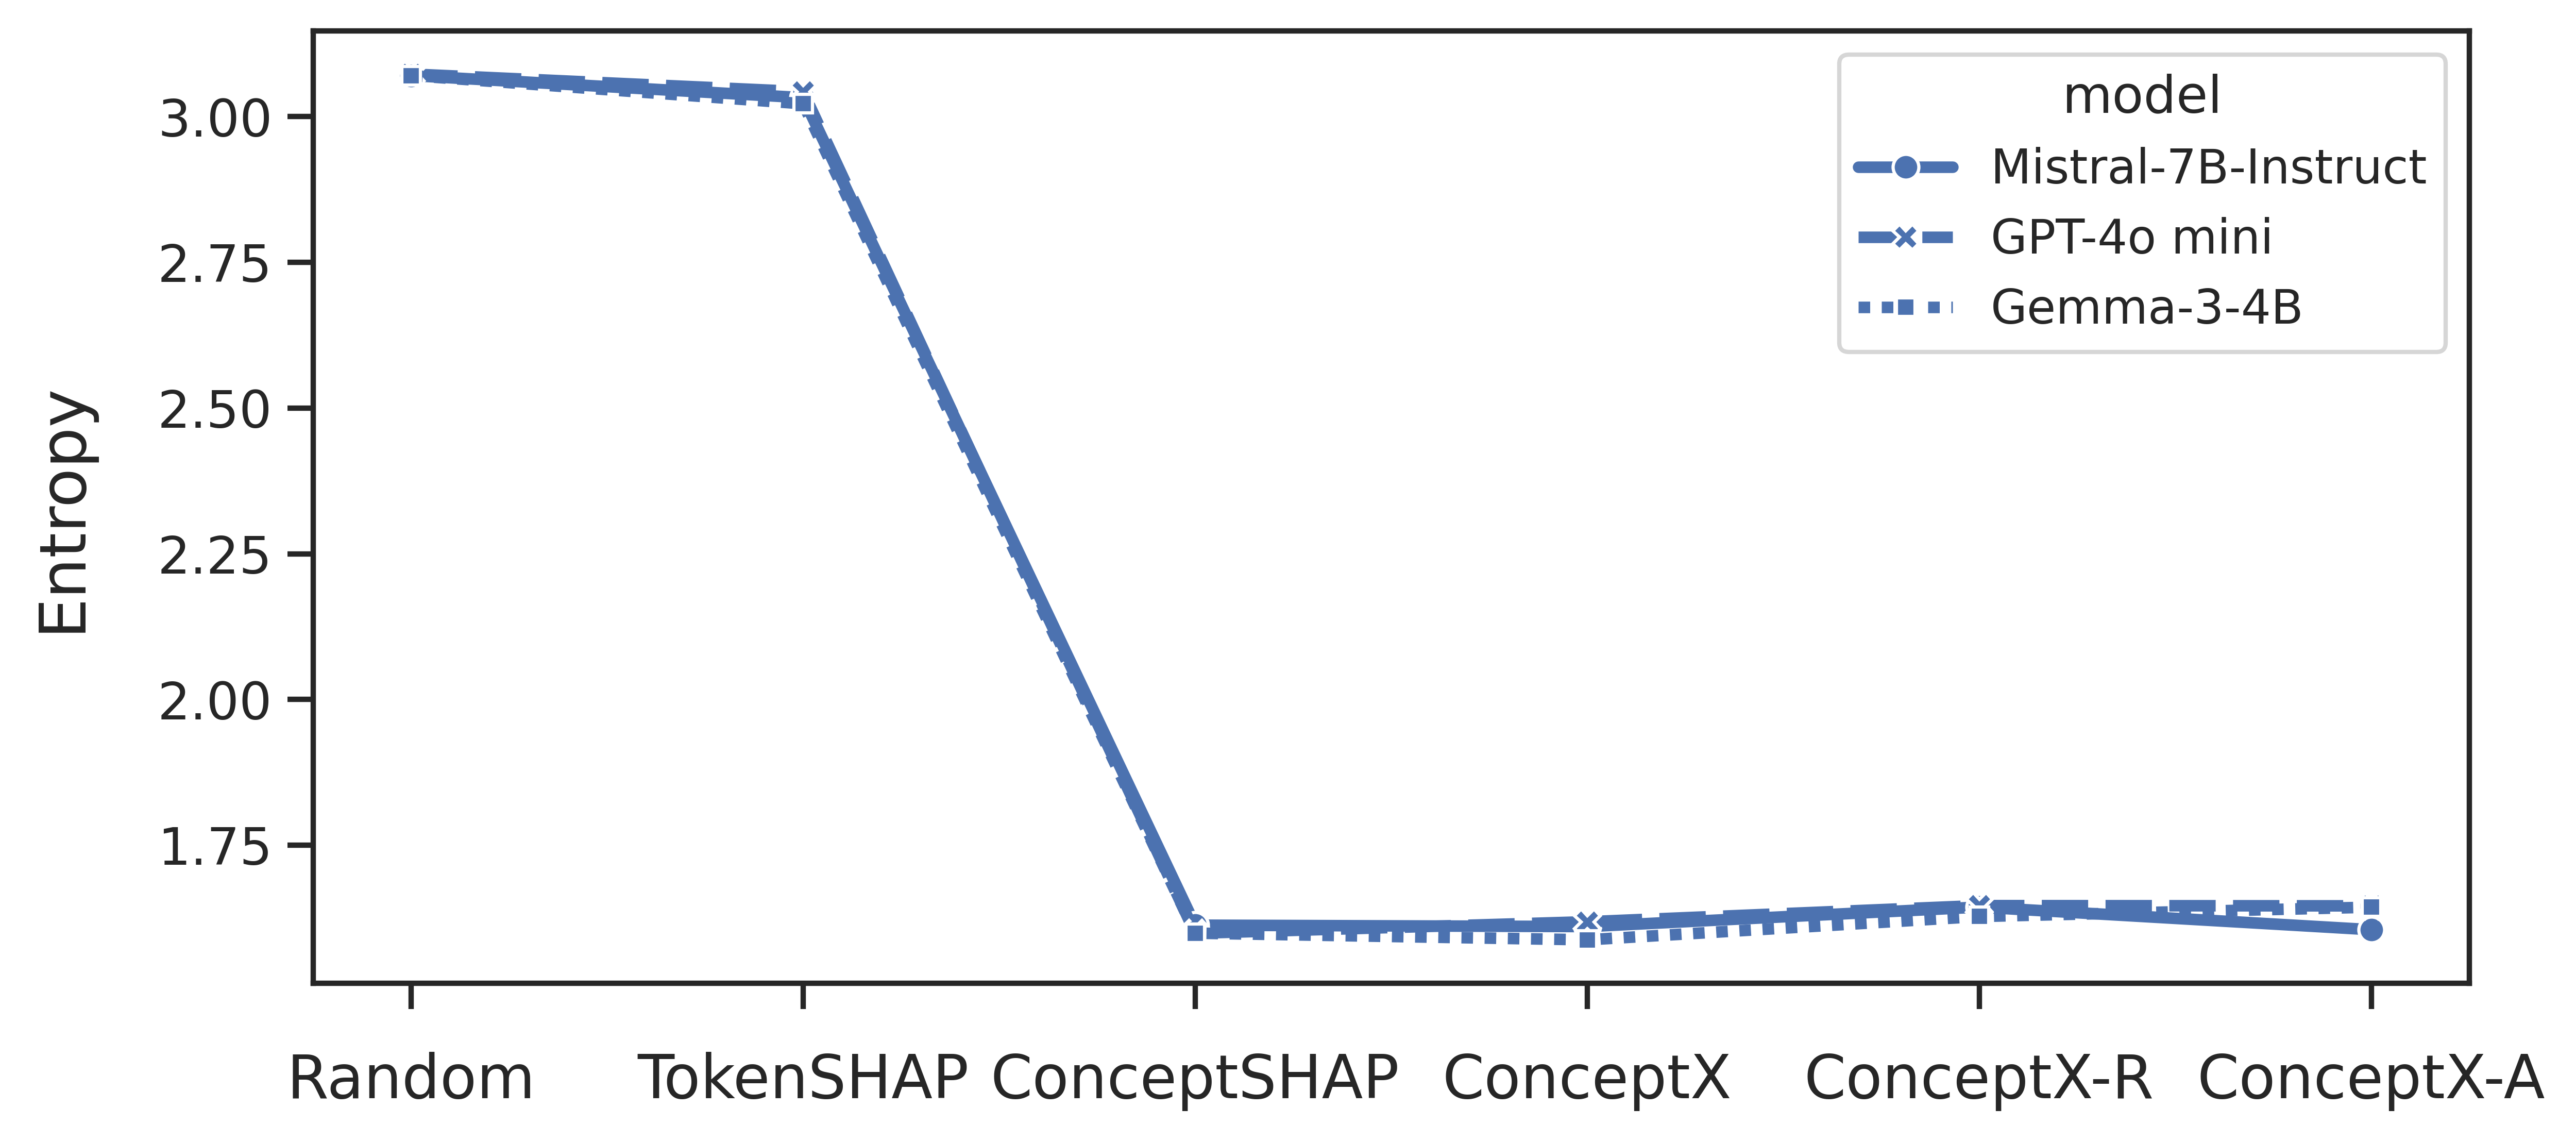

In [25]:
df = df_all[(df_all["dataset"]==dataset)&(df_all["model"].isin(['gemma-3-4b', 'gpt4o-mini', 'mistral-7b-it']))]
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
df["model"] = df["model"].replace(model_map)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    data=df, 
    x="explainer", 
    y="entropy", 
    style="model",  # Different models get different line styles (dashes)
    markers=True,  # Add markers for visibility
    errorbar=None,
    linewidth=2.7
)

# Formatting
plt.xlabel('')
plt.ylabel("Entropy", fontsize=15, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', which='major', pad=10)
# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in model_order]
ordered_labels = [label for label in model_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left', title="Model",
    bbox_to_anchor=(0.7, 0.98), ncol=1, fontsize=13, frameon=False,
    handlelength=3, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(2)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()
fig.savefig(os.path.join(save_dir, f"figures/accuracy/entropy_{dataset}.pdf"), bbox_inches='tight', dpi=600)

# Show plot
plt.show()

In [13]:
# Group by 'model' and calculate the mean and variance of 'entropy'
df = summary_df[(summary_df["model"].isin(['gemma-3-4b', 'gpt4o-mini', 'llama-3-3b']))]
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
entropy_stats = df.groupby(['model', 'explainer'])['entropy'].agg(['mean', 'var']).reset_index()
entropy_stats

/tmp/ipykernel_759237/2306108367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = df["explainer"].replace(explainer_map)
/tmp/ipykernel_759237/2306108367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
/tmp/ipykernel_759237/2306108367.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

,model,explainer,mean,var
0,gemma-3-4b,Random,3.070639,NaN
1,gemma-3-4b,TokenSHAP,3.043340,NaN
2,gemma-3-4b,ConceptSHAP,1.578829,NaN
3,gemma-3-4b,ConceptX,1.583345,NaN
4,gemma-3-4b,ConceptX-R,1.634849,NaN
5,gemma-3-4b,ConceptX-A,1.649413,NaN
6,gpt4o-mini,Random,3.071924,NaN
7,gpt4o-mini,TokenSHAP,3.027997,NaN
8,gpt4o-mini,ConceptSHAP,1.606101,NaN
9,gpt4o-mini,ConceptX,1.593623,NaN
